# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

[nltk_data] Downloading package stopwords to C:\Users\AEC-
[nltk_data]     MEDIA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | We chose Rotterdam and Lond...
1,✅ Trip Verified | The entire booking and ticke...
2,Not Verified | British Airways cancelled my ...
3,Not Verified | I wanted to write this review s...
4,✅ Trip Verified | Check in fast and friendly....


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
data = pd.read_csv("data/BA_reviews.csv")

In [6]:
data.dtypes

Unnamed: 0     int64
reviews       object
dtype: object

In [7]:
data.columns

Index(['Unnamed: 0', 'reviews'], dtype='object')

In [8]:
data.isnull().sum()

Unnamed: 0    0
reviews       0
dtype: int64

In [9]:
data.shape

(1000, 2)

In [10]:
data.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | We chose Rotterdam and Lond...
1,1,✅ Trip Verified | The entire booking and ticke...
2,2,Not Verified | British Airways cancelled my ...
3,3,Not Verified | I wanted to write this review s...
4,4,✅ Trip Verified | Check in fast and friendly....


In [11]:
data['reviews'] = data['reviews'].str.replace('✅', '')
data['reviews'] = data['reviews'].str.replace('❎', '')

In [12]:
data[['review verification', 'remaining_text']] = data['reviews'].str.strip().str.split(' \| ', expand=True)

In [13]:
data.head()

,Unnamed: 0,reviews,review verification,remaining_text
0,0,Trip Verified | We chose Rotterdam and Londo...,Trip Verified,We chose Rotterdam and London City airport be...
1,1,Trip Verified | The entire booking and ticket...,Trip Verified,The entire booking and ticketing experience ha...
2,2,Not Verified | British Airways cancelled my ...,Not Verified,British Airways cancelled my flight less tha...
3,3,Not Verified | I wanted to write this review s...,Not Verified,I wanted to write this review so I could give ...
4,4,Trip Verified | Check in fast and friendly. ...,Trip Verified,Check in fast and friendly. Security a breeze...


In [14]:
data = data[['review verification', 'remaining_text']]
data = data.rename(columns={'remaining_text': 'reviews'})

In [15]:
data.head()

,review verification,reviews
0,Trip Verified,We chose Rotterdam and London City airport be...
1,Trip Verified,The entire booking and ticketing experience ha...
2,Not Verified,British Airways cancelled my flight less tha...
3,Not Verified,I wanted to write this review so I could give ...
4,Trip Verified,Check in fast and friendly. Security a breeze...


In [16]:
data['review verification'].value_counts().unique()


array([742, 236,   1], dtype=int64)

In [17]:
data.isna().sum()

review verification     0
reviews                21
dtype: int64

In [18]:
data.dropna(inplace=True)

In [19]:
data.isna().sum()

review verification    0
reviews                0
dtype: int64

In [20]:
data.head()

,review verification,reviews
0,Trip Verified,We chose Rotterdam and London City airport be...
1,Trip Verified,The entire booking and ticketing experience ha...
2,Not Verified,British Airways cancelled my flight less tha...
3,Not Verified,I wanted to write this review so I could give ...
4,Trip Verified,Check in fast and friendly. Security a breeze...


In [21]:
#Distinct values of 'verification' and its count  
data['review verification'].value_counts()

Trip Verified    742
Not Verified     236
cNot Verified      1
Name: review verification, dtype: int64

In [22]:
data['review verification'] = data['review verification'].str.replace('cNot Verified', 'Not Verified')

In [23]:
data.shape

(979, 2)

In [24]:
#Creating a new column 'length' that will contain the length of the string in 'verified_reviews' column

data['length'] = data['reviews'].apply(len)

In [25]:
data.head()

,review verification,reviews,length
0,Trip Verified,We chose Rotterdam and London City airport be...,903
1,Trip Verified,The entire booking and ticketing experience ha...,1011
2,Not Verified,British Airways cancelled my flight less tha...,649
3,Not Verified,I wanted to write this review so I could give ...,740
4,Trip Verified,Check in fast and friendly. Security a breeze...,439


In [26]:
len(data)

979

In [27]:
data['review verification'].value_counts()

Trip Verified    742
Not Verified     237
Name: review verification, dtype: int64

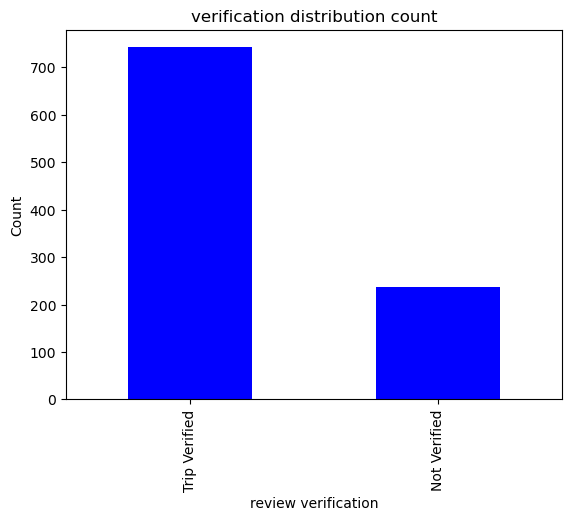

In [28]:
#Bar plot to visualize the total counts of each rating

data['review verification'].value_counts().plot.bar(color = 'blue')
plt.title('verification distribution count')
plt.xlabel('review verification')
plt.ylabel('Count')
plt.show()

In [29]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records

print(f"Verification value count - percentage distribution: \n{round(data['review verification'].value_counts()/data.shape[0]*100,2)}")

Verification value count - percentage distribution: 
Trip Verified    75.79
Not Verified     24.21
Name: review verification, dtype: float64


In [30]:
data['length'].describe()

count     979.000000
mean      819.150153
std       572.900537
min       130.000000
25%       416.000000
50%       665.000000
75%      1038.000000
max      3464.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distribution of length of review ')]

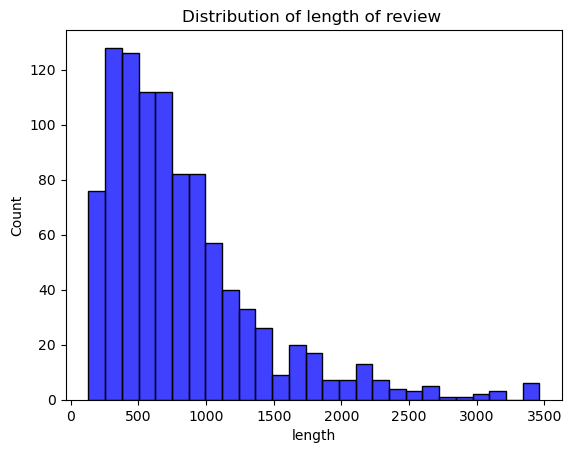

In [31]:
sns.histplot(data['length'],color='blue').set(title='Distribution of length of review ')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = "Trip Verified"')]

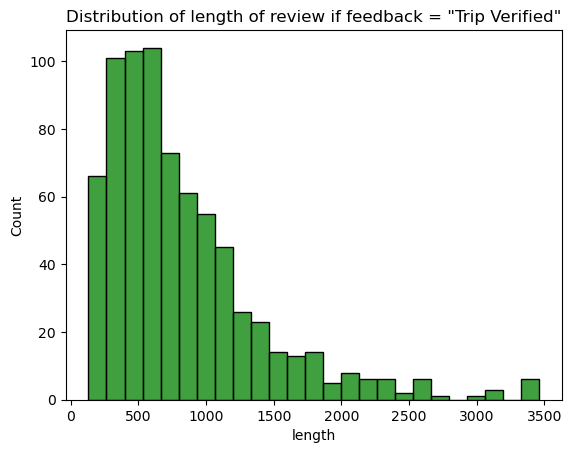

In [32]:
sns.histplot(data[data['review verification']=="Trip Verified"]['length'],color='green').set(title='Distribution of length of review if feedback = "Trip Verified"')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = "Not Verified"')]

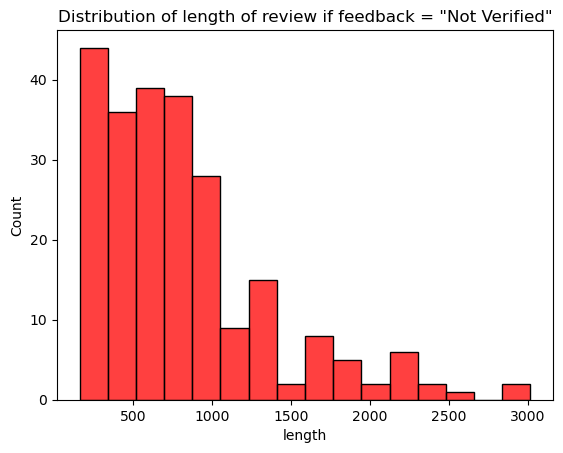

In [33]:
sns.histplot(data[data['review verification']=="Not Verified"]['length'],color='red').set(title='Distribution of length of review if feedback = "Not Verified"')

In [34]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.reviews)

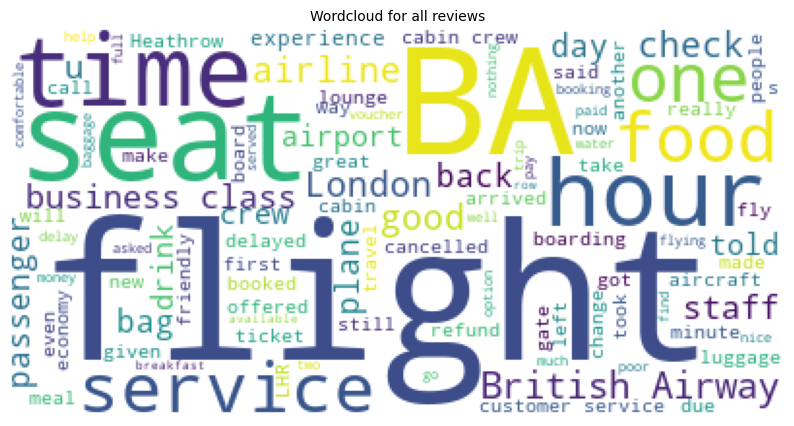

In [35]:
# Combine all reviews
reviews = " ".join([review for review in data['reviews']])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=100)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [36]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in data[data['review verification'] == "Trip Verified"]['reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['review verification'] == "Not Verified"]['reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

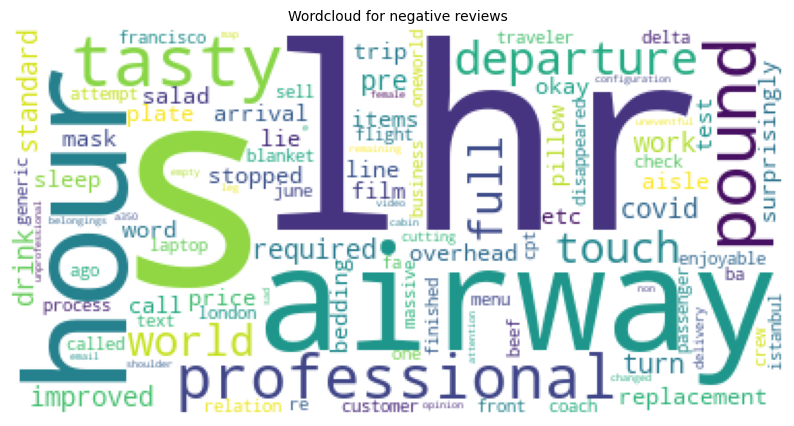

In [37]:
wc = WordCloud(background_color='white', max_words=100)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

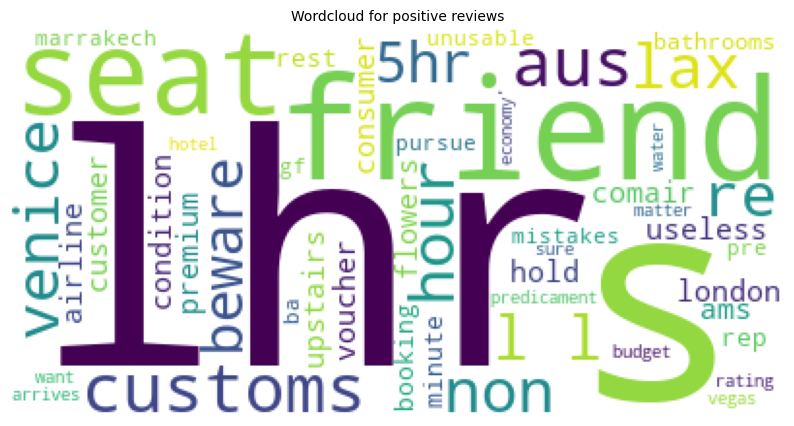

In [38]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

In [39]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in data[data['review verification'] == "Not Verified"]['reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['review verification'] == "Trip Verified"]['reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

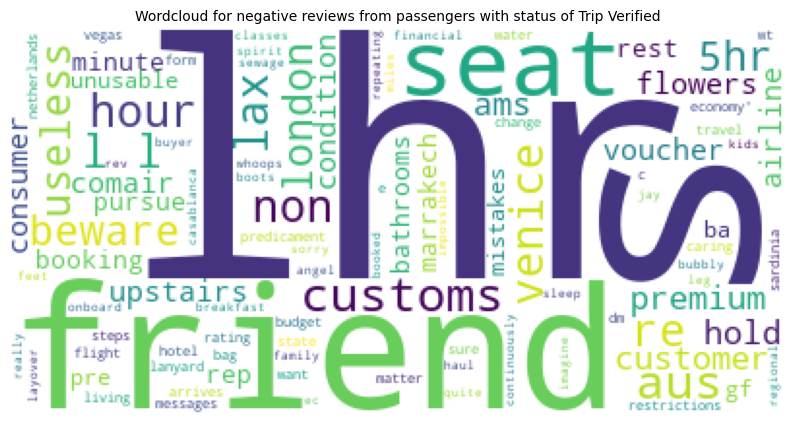

In [40]:
wc = WordCloud(background_color='white', max_words=100)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews from passengers with status of Trip Verified', fontsize=10)
plt.axis('off')
plt.show()

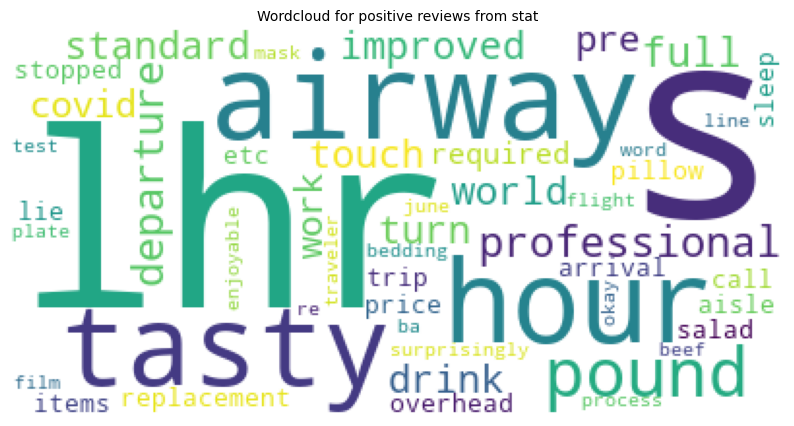

In [41]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews from stat', fontsize=10)
plt.axis('off')
plt.show()

In [42]:
# Function to perform sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Classify sentiment as positive, negative, or neutral based on polarity
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [43]:
# Add a new column 'sentiment' to store the sentiment analysis result
data['sentiment'] = data['reviews'].apply(analyze_sentiment)

In [44]:
data.head()

,review verification,reviews,length,sentiment
0,Trip Verified,We chose Rotterdam and London City airport be...,903,positive
1,Trip Verified,The entire booking and ticketing experience ha...,1011,negative
2,Not Verified,British Airways cancelled my flight less tha...,649,negative
3,Not Verified,I wanted to write this review so I could give ...,740,positive
4,Trip Verified,Check in fast and friendly. Security a breeze...,439,positive


In [45]:
data[['review verification', 'sentiment']].value_counts()

review verification  sentiment
Trip Verified        positive     473
                     negative     261
Not Verified         positive     149
                     negative      86
Trip Verified        neutral        8
Not Verified         neutral        2
dtype: int64

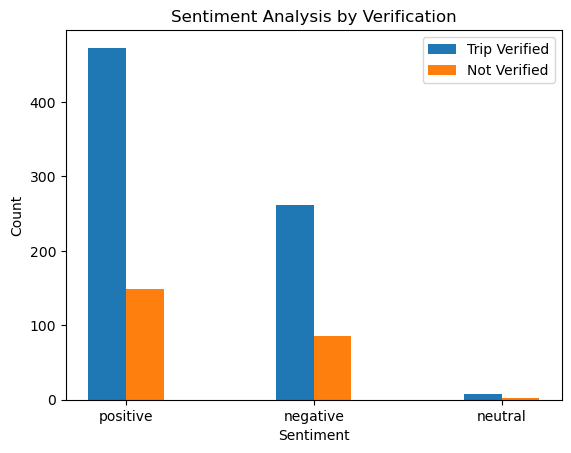

In [46]:
# Data
data = {
    ('Trip Verified', 'positive'): 473,
    ('Trip Verified', 'negative'): 261,
    ('Not Verified', 'positive'): 149,
    ('Not Verified', 'negative'): 86,
    ('Trip Verified', 'neutral'): 8,
    ('Not Verified', 'neutral'): 2
}

# Group data by verification and sentiment
verification_groups = {}
sentiments = ['positive', 'negative', 'neutral']
for verification, sentiment in data.keys():
    if verification not in verification_groups:
        verification_groups[verification] = []
    verification_groups[verification].append(data[(verification, sentiment)])

# Plot
x = range(len(sentiments))
width = 0.2
fig, ax = plt.subplots()
for i, (verification, counts) in enumerate(verification_groups.items()):
    ax.bar([pos + i * width for pos in x], counts, width=width, label=verification)

ax.set_xticks([pos + 0.5 * width for pos in x])
ax.set_xticklabels(sentiments)
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis by Verification')
ax.legend()

plt.show()


In [47]:
df.to_csv("data/BA_reviews_completed.csv")